In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("training_SyncPatient.csv").dropna()
test = pd.read_csv("test_SyncPatient.csv").dropna()

## EDA

In [4]:
# cleaning: DOB to Age 
data["age"] = (2022 - data["YearOfBirth"]).astype(int)
data = data.drop("YearOfBirth",axis=1)
data = data.reset_index().drop("index",axis=1)
data

,PatientGuid,DMIndicator,Gender,State,PracticeGuid,age
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0,M,SD,7BF4DAD8-5F67-4985-B911-20C9E89A3737,93
1,C6746626-6783-4650-A58F-00065649139A,0.0,F,TX,E7101967-2FF1-4B0F-8129-B0B429D1D15C,37
2,E05C6E8F-779F-4594-A388-000C635AE4D3,0.0,F,NJ,FC01A799-1CAF-464F-A86F-8A666AB86F32,38
3,EAEBD216-F847-4355-87B2-000D942E08F0,0.0,M,OH,EEBC95EF-79BE-4542-892E-98D3166BAB20,63
4,C7F10A80-4934-42D2-8540-000FBEBA75C8,0.0,F,FL,677BA32E-B4C4-48F2-86E4-08C42B135401,32
...,...,...,...,...,...,...
6595,83492E15-745E-4A3E-A05E-A737E5088CEB,0.0,M,CA,DD0D8C67-1F38-4BFE-A54E-191AB0C66FCA,97
6596,9CAE08C1-F6E4-4B9A-A1D4-A7392CF5159B,0.0,M,CA,7AFFC5D8-05B5-405E-9A9F-8D18190A5FEF,53
6597,FEF04377-E07A-4389-9493-A749165D8D78,0.0,F,SD,7BF4DAD8-5F67-4985-B911-20C9E89A3737,64
6598,052D137A-DFB2-4806-9434-A74A54A46E14,0.0,M,FL,6373C626-559A-40B5-9936-AEEE8B4CAB5E,66


### age 

In [976]:
diabete = data[data["DMIndicator"]==1]
non_diabete = data[data["DMIndicator"]==0]



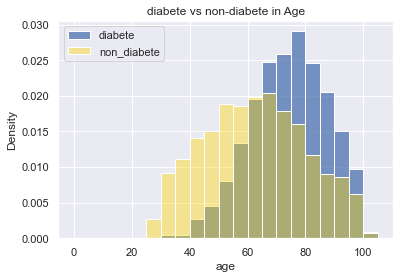

In [977]:
sns.set(rc = {'figure.figsize':(6,4)})
bins = np.arange(0,110,5)
sns.histplot(diabete["age"], bins=bins,stat='density', label='diabete', ec='w');
sns.histplot(non_diabete["age"], bins=bins,stat='density', label='non_diabete', color='gold', alpha = 0.4, ec='w');
plt.title("diabete vs non-diabete in Age")
plt.legend();

### gender

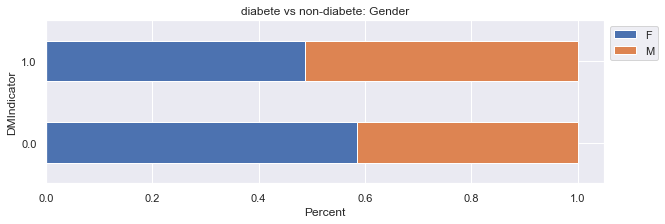

In [978]:
sns.set(rc = {'figure.figsize':(10,3)})
table = pd.crosstab(data.DMIndicator,data.Gender);
table.div(table.sum(1).astype(float), axis=0).plot(kind='barh',stacked=True);
plt.title('diabete vs non-diabete: Gender');
plt.legend(loc='best',bbox_to_anchor=(1, 1))
plt.xlabel('Percent');
plt.ylabel('DMIndicator');

### smoke condition

In [979]:
SmokingStatus = pd.read_csv("training_SyncPatientSmokingStatus.csv")
SmokingStatus_desc = pd.read_csv("SyncSmokingStatus.csv")

In [980]:
# merge smoking stuatus
data = data.merge(SmokingStatus,how="left",left_on="PatientGuid",right_on="PatientGuid")
data = data.merge(SmokingStatus_desc,how="left",left_on="SmokingStatusGuid",right_on="SmokingStatusGuid")
data

,PatientGuid,DMIndicator,Gender,State,PracticeGuid,age,PatientSmokingStatusGuid,SmokingStatusGuid,EffectiveYear,Description,NISTcode
0,FB6EFC3D-1A20-4497-9CBD-00027CC5D220,0.0,M,SD,7BF4DAD8-5F67-4985-B911-20C9E89A3737,93,NaN,NaN,NaN,NaN,NaN
1,C6746626-6783-4650-A58F-00065649139A,0.0,F,TX,E7101967-2FF1-4B0F-8129-B0B429D1D15C,37,81B1B096-EDD6-4B8B-9BCC-8B6709C11726,5ABBAB35-836F-4F3E-8632-CE063828DA15,2012.0,0 cigarettes per day (non-smoker or less than ...,4.0
2,E05C6E8F-779F-4594-A388-000C635AE4D3,0.0,F,NJ,FC01A799-1CAF-464F-A86F-8A666AB86F32,38,NaN,NaN,NaN,NaN,NaN
3,EAEBD216-F847-4355-87B2-000D942E08F0,0.0,M,OH,EEBC95EF-79BE-4542-892E-98D3166BAB20,63,2D278128-6903-4EAF-979D-852D1B830F3E,FCD437AA-0451-4D8A-9396-B6F19D8B25E8,1970.0,1-2 packs per day,1.0
4,EAEBD216-F847-4355-87B2-000D942E08F0,0.0,M,OH,EEBC95EF-79BE-4542-892E-98D3166BAB20,63,941122E5-54C2-4F75-88D1-AB4FE065C44A,FCD437AA-0451-4D8A-9396-B6F19D8B25E8,2011.0,1-2 packs per day,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6920,83492E15-745E-4A3E-A05E-A737E5088CEB,0.0,M,CA,DD0D8C67-1F38-4BFE-A54E-191AB0C66FCA,97,E7E6C0CA-9E72-409C-AA7A-59F8BEF99A18,5ABBAB35-836F-4F3E-8632-CE063828DA15,2012.0,0 cigarettes per day (non-smoker or less than ...,4.0
6921,9CAE08C1-F6E4-4B9A-A1D4-A7392CF5159B,0.0,M,CA,7AFFC5D8-05B5-405E-9A9F-8D18190A5FEF,53,NaN,NaN,NaN,NaN,NaN
6922,FEF04377-E07A-4389-9493-A749165D8D78,0.0,F,SD,7BF4DAD8-5F67-4985-B911-20C9E89A3737,64,NaN,NaN,NaN,NaN,NaN
6923,052D137A-DFB2-4806-9434-A74A54A46E14,0.0,M,FL,6373C626-559A-40B5-9936-AEEE8B4CAB5E,66,C8464E5E-544B-4721-B1A1-B33C4CE5BF9B,1F3BFBBF-AB76-481B-B1E0-08A3689A54BC,2011.0,Not a current tobacco user,0.0


In [981]:
# check duplicates
print("duplicates before:",sum(data["PatientGuid"].duplicated()))

# keeping the most recent effective record 
data = data.sort_values(by="EffectiveYear",ascending=False)
data = data.drop_duplicates("PatientGuid")
data = data.sort_index().reset_index().drop("index",axis=1)

print("duplicates after:",sum(data["PatientGuid"].duplicated()))

duplicates before: 325
duplicates after: 0


In [982]:
smoke = data[~data["SmokingStatusGuid"].isnull()]
len(smoke)

2921

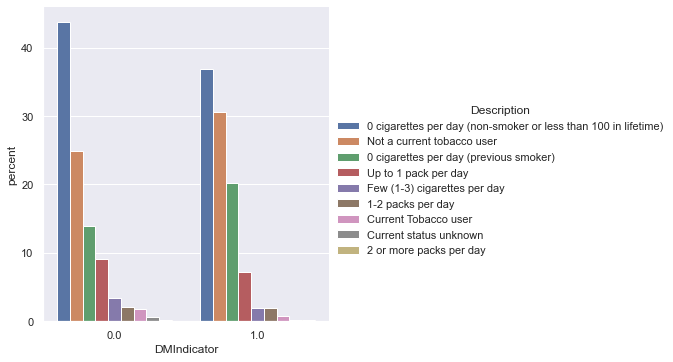

In [983]:
sns.set(rc = {'figure.figsize':(10,5)})
p = smoke.groupby('DMIndicator')['Description'].value_counts(normalize=True).mul(100).rename('percent').reset_index() \
.pipe((sns.catplot,'data'), x='DMIndicator',y='percent',hue='Description',kind='bar');

# overall, about 85% of patients in the train dataset are non-smoker, no matter if they have diabete
 
# the category definition is not very clear, such as no big diff between 0 cig per day(prev smoker) and not a current tabacco user, 
# so let's just break into two category: present smoker and non-smoker 

In [984]:
non_smoker_category = ["5ABBAB35-836F-4F3E-8632-CE063828DA15","C12C2DB7-D31A-4514-88C0-42CBD339F764","1F3BFBBF-AB76-481B-B1E0-08A3689A54BC"]
smoker_category = ["FCD437AA-0451-4D8A-9396-B6F19D8B25E8","02116D5A-F26C-4A48-9A11-75AC21BC4FD3","2548BD83-03AE-4287-A578-FA170F39E32F","FA2B7AE4-4D14-4768-A8C7-55B5F0CDF4AF","DD01E545-D7AF-4F00-B248-9FD40010D81D"]

smoke.loc[:,"is_smoker"] = ""
smoke.loc[smoke["SmokingStatusGuid"].isin(non_smoker_category),"is_smoker"] = "smoker"
smoke.loc[smoke["SmokingStatusGuid"].isin(smoker_category),"is_smoker"] = "non-smoker"
smoke.loc[(~smoke["SmokingStatusGuid"].isin(smoker_category))&(~smoke["SmokingStatusGuid"].isin(non_smoker_category)),"is_smoker"] = np.nan
smoke['is_smoker'] = smoke['is_smoker'].fillna(method="ffill")

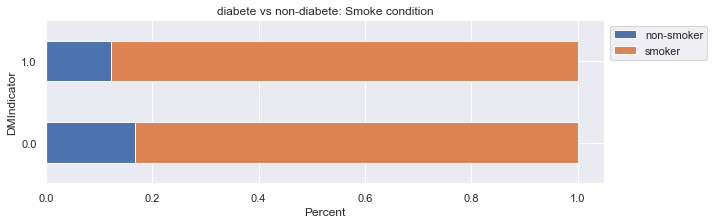

In [985]:
sns.set(rc = {'figure.figsize':(10,3)})
table = pd.crosstab(smoke.DMIndicator,smoke.is_smoker);
table.div(table.sum(1).astype(float), axis=0).plot(kind='barh',stacked=True);
plt.title('diabete vs non-diabete: Smoke condition');
plt.legend(loc='best',bbox_to_anchor=(1, 1))
plt.xlabel('Percent');
plt.ylabel('DMIndicator');
# by breaking to binary category:smoker or non-smoker, there's little difference between diabete and non-diabete patients 

### transcript data

In [986]:
transcript = pd.read_csv("training_SyncTranscript.csv")
# drop null or 0 values 
transcript = transcript[transcript["BMI"] != 0].drop(["HeartRate","PhysicianSpecialty"],axis=1)

# drop duplicates: keeping the most recent effective record 
transcript = transcript.sort_values(by="VisitYear",ascending=False)
transcript = transcript.drop_duplicates("PatientGuid")
transcript = transcript.sort_index().reset_index().drop("index",axis=1)

# impute null with mean 
transcript = transcript.fillna(transcript.mean())

In [987]:
data = pd.merge(data,transcript,how="left",on="PatientGuid")

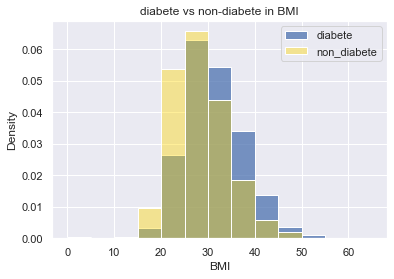

In [988]:
diabete = data[data["DMIndicator"]==1]
non_diabete = data[data["DMIndicator"]==0]
diabete
sns.set(rc = {'figure.figsize':(6,4)})
bins = np.arange(0,70,5)
sns.histplot(diabete["BMI"], bins=bins,stat='density', label='diabete', ec='w');
sns.histplot(non_diabete["BMI"], bins=bins,stat='density', label='non_diabete', color='gold', alpha  = 0.4,ec='w');
plt.title("diabete vs non-diabete in BMI")
plt.legend();

## we can see that BMI of diabete patients is higher 

## Feature Engineering

### diagnosis data (icd9)

In [989]:
def categorize_icd9code(code):
    icd9code = {    
        '272': 'Disorders of lipoid metabolism',
        '401': 'Essential hypertension',
        '585': 'Chronic renal failure',
        '715': 'Osteoarthrosis and allied disorders',
        '414': 'Other forms of chronic ischemic heart disease',
        '782': 'Symptoms involving skin and other integumentary tissue',
        '443': 'Other peripheral vascular disease',
        '428': 'Heart failure',
        '285': 'Other and unspecified anemias',
        '781': 'Symptoms involving nervous and musculoskeletal systems',
        '276': 'Disorders of fluid, electrolyte, and acid-base balance',
        '791': 'Nonspecific findings on examination of urine',
        'v03+v04': 'prophylactic vaccination and inoculation',
        '600': 'Hyperplasia of prostate',
        '715': 'certain conditions originating in the perinatal period',
        '716': 'Other and unspecified arthropathies',
        '496': 'Chronic airway obstruction, not elsewhere classified',
        '438': 'Late effects of cerebrovascular disease',
        '461': 'Acute sinusitis',
        '706': 'Diseases of sebaceous glands',
        '314': 'Hyperkinetic syndrome of childhood',
        '300':'Neurotic disorders'
    }
    code = code.split('.')[0]
    if ('V03' in code.upper()) or ('V04' in code.upper()): return 'prophylactic vaccination and inoculation'
    elif ('E' in code.upper()) or ('V' in code.upper()): return 'Other Supplementary'
    elif int(code) == 272: return 'Disorders of lipoid metabolism'
    elif int(code) == 401: return 'Essential hypertension'
    elif int(code) == 585: return 'Chronic renal failure'
    elif int(code) == 715: return 'Osteoarthrosis and allied disorders'
    elif int(code) == 414: return 'Other forms of chronic ischemic heart disease'
    elif int(code) == 782: return 'Symptoms involving skin and other integumentary tissue'
    elif int(code) == 443: return 'Other peripheral vascular disease'
    elif int(code) == 428: return 'Heart failure'
    elif int(code) == 285: return 'Other and unspecified anemias'
    elif int(code) == 781: return 'Symptoms involving nervous and musculoskeletal systems'
    elif int(code) == 276: return 'Disorders of fluid, electrolyte, and acid-base balance'
    elif int(code) == 791: return 'Nonspecific findings on examination of urine'
    elif int(code) == 600: return 'Hyperplasia of prostate'
    elif int(code) == 715: return 'certain conditions originating in the perinatal period'
    elif int(code) == 716: return 'Other and unspecified arthropathies'
    elif int(code) == 496: return 'Chronic airway obstruction, not elsewhere classified'
    elif int(code) == 438: return 'Late effects of cerebrovascular disease'   
    elif int(code) == 461: return 'Acute sinusitis'
    elif int(code) == 706: return 'Diseases of sebaceous glands'
    elif int(code) == 314: return 'Hyperkinetic syndrome of childhood'
    elif int(code) == 300: return 'Neurotic disorders' 
    else: return 'Other Comorbidity categories'

In [990]:
Diagnosis = pd.read_csv("training_SyncDiagnosis.csv")
Diagnosis['ICD9CodeCategory'] = Diagnosis.ICD9Code.apply(lambda x:categorize_icd9code(x))

In [991]:
# aggregate and get dummies of ICD9CodeCategory 
diagnosis_agg = Diagnosis[['ICD9CodeCategory']]
diagnosis_agg.index = Diagnosis.PatientGuid
diagnosis_agg = pd.get_dummies(diagnosis_agg,prefix='',prefix_sep='').reset_index().groupby('PatientGuid').sum()
data = data.set_index("PatientGuid").join(diagnosis_agg).reset_index()

In [992]:
'''
# I think we need to take state population into consideration
# but not sure if should do some adjustment for onehot encoding of state 

pop = pd.read_csv("pop_2012.csv")
pat_by_state = Patient.groupby("State").agg(len).reset_index()
pat_pop_merged = pat_by_state.merge(pop,how="inner",left_on="State",right_on="Code")[["State_x","PatientGuid","POP_2012"]]
pat_pop_merged.loc[:,"patient density"] = pat_pop_merged["PatientGuid"]/pat_pop_merged["POP_2012"]
pat_pop_merged = pat_pop_merged.sort_values("patient density",ascending=False)

for i in range(len(onehot)):
    for j in range(len(pat_pop_merged)):
        if onehot.loc[i,"State_"+str(pat_pop_merged.loc[j,"State_x"])] == 1:
            onehot.loc[i,"State_"+str(pat_pop_merged.loc[j,"State_x"])] = pat_pop_merged.loc[j,"patient density"]       
'''

'\n# I think we need to take state population into consideration\n# but not sure if should do some adjustment for onehot encoding of state \n\npop = pd.read_csv("pop_2012.csv")\npat_by_state = Patient.groupby("State").agg(len).reset_index()\npat_pop_merged = pat_by_state.merge(pop,how="inner",left_on="State",right_on="Code")[["State_x","PatientGuid","POP_2012"]]\npat_pop_merged.loc[:,"patient density"] = pat_pop_merged["PatientGuid"]/pat_pop_merged["POP_2012"]\npat_pop_merged = pat_pop_merged.sort_values("patient density",ascending=False)\n\nfor i in range(len(onehot)):\n    for j in range(len(pat_pop_merged)):\n        if onehot.loc[i,"State_"+str(pat_pop_merged.loc[j,"State_x"])] == 1:\n            onehot.loc[i,"State_"+str(pat_pop_merged.loc[j,"State_x"])] = pat_pop_merged.loc[j,"patient density"]       \n'

In [993]:
data["DMIndicator"] = data["DMIndicator"].astype(float)

In [994]:
X_cols = ['age',  'Gender', 'Height', 'Weight', 'BMI', 'State',
       'SystolicBP', 'DiastolicBP','RespiratoryRate', 'Temperature',
       'Acute sinusitis','Chronic airway obstruction, not elsewhere classified',
       'Chronic renal failure', 'Diseases of sebaceous glands',
       'Disorders of fluid, electrolyte, and acid-base balance',
       'Disorders of lipoid metabolism', 'Essential hypertension',
       'Heart failure', 'Hyperkinetic syndrome of childhood',
       'Hyperplasia of prostate', 'Late effects of cerebrovascular disease',
       'Neurotic disorders', 'Nonspecific findings on examination of urine',
       'Osteoarthrosis and allied disorders', 'Other Comorbidity categories',
       'Other Supplementary', 'Other and unspecified anemias',
       'Other and unspecified arthropathies',
       'Other forms of chronic ischemic heart disease',
       'Other peripheral vascular disease',
       'Symptoms involving nervous and musculoskeletal systems',
       'Symptoms involving skin and other integumentary tissue',
       'prophylactic vaccination and inoculation']

Y_cols = ["DMIndicator"]

X, y = data[X_cols],data[Y_cols]

### One hot encoding

In [995]:
X = pd.get_dummies(X,prefix="is",drop_first=True) 

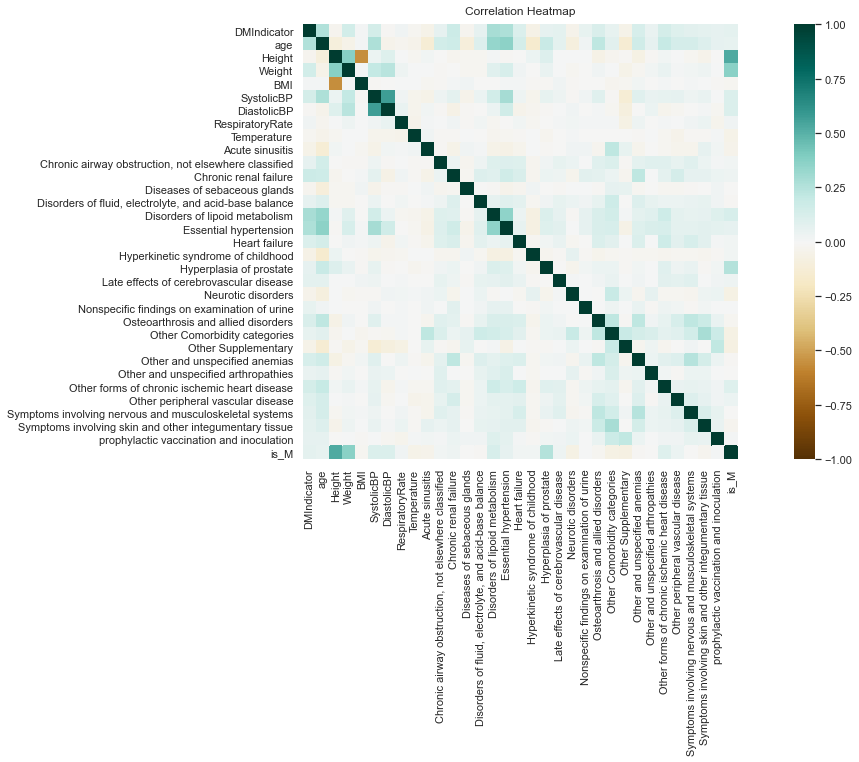

In [996]:
plt.figure(figsize=(20,8));
corr_heatmap = sns.heatmap(y.join(X.iloc[:,:32]).corr(),vmin=-1, vmax=1,cmap='BrBG',square=True);
corr_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=10);

### Train and Split

In [997]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,stratify = y)

### Oversampling

In [998]:
# Oversample using SMOTE Algorithm
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_ovsp, y_train_ovsp = oversample.fit_resample(X_train, y_train)

### Standardization

In [999]:
 from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_std_ovsp = scalar.fit_transform(X_train_ovsp)
X_test_std_ovsp = scalar.transform(X_test)

### Cross validation 

In [1000]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2',random_state=42).fit(X_train_std_ovsp,y_train_ovsp)


cv = StratifiedKFold(n_splits=10)
cv_scores = cross_val_score(logreg,X_train_std_ovsp,y_train_ovsp,scoring="accuracy",cv=cv)
print('Cross-Validation Accuracy Scores', np.mean(cv_scores))

Cross-Validation Accuracy Scores 0.846553148963158


Mean Cross Validation Accuracy 0.846553148963158
Standard Deviation of Cross Validation Accuracy 0.1388004154953101


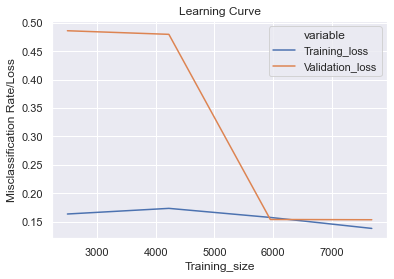

In [1001]:
# build learning curve
from sklearn.model_selection import learning_curve
train_size,train_scores,test_scores = learning_curve(estimator=logreg,X=X_train_std_ovsp,y=y_train_ovsp,cv=cv)        
train_scores = 1-np.mean(train_scores,axis=1) #converting the accuracy score to misclassification rate
test_scores = 1-np.mean(test_scores,axis=1) #converting the accuracy score to misclassification rate   
lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")   
# lc = learning_curves(clf,X,y,5)
 
print("Mean Cross Validation Accuracy",np.mean(cv_scores))
print("Standard Deviation of Cross Validation Accuracy",np.std(cv_scores))
    
# plot learning curve
sns.lineplot(data=lc,x="Training_size",y="value",hue="variable")
plt.title("Learning Curve")
plt.ylabel("Misclassification Rate/Loss");

## Modeling (test)

### logistic regression

In [922]:
y_test_pred = logreg.predict(X_test_std_ovsp)
y_test_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [923]:
sum(y_test_pred==1)

138

In [924]:
from collections import Counter
Counter(y_test_pred)

Counter({0.0: 1182, 1.0: 138})

### Classification report 

In [925]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      1067
         1.0       0.60      0.33      0.42       253

    accuracy                           0.83      1320
   macro avg       0.73      0.64      0.66      1320
weighted avg       0.81      0.83      0.81      1320



### Confusion matrix 

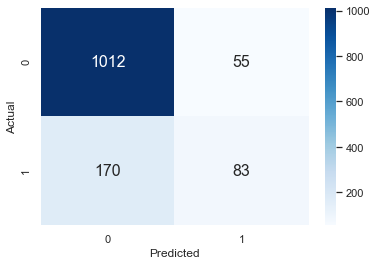

In [926]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt = 'd', cmap = 'Blues', annot_kws = {'size': 16})
plt.xlabel('Predicted')
plt.ylabel('Actual');

### ROC curve

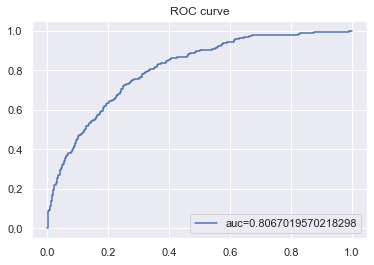

In [927]:
# create a ROC curve
from sklearn import metrics

y_pred_proba = logreg.predict_proba(X_test_std_ovsp)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)

auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label = "auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC curve")
plt.show()

### Feature coefs 

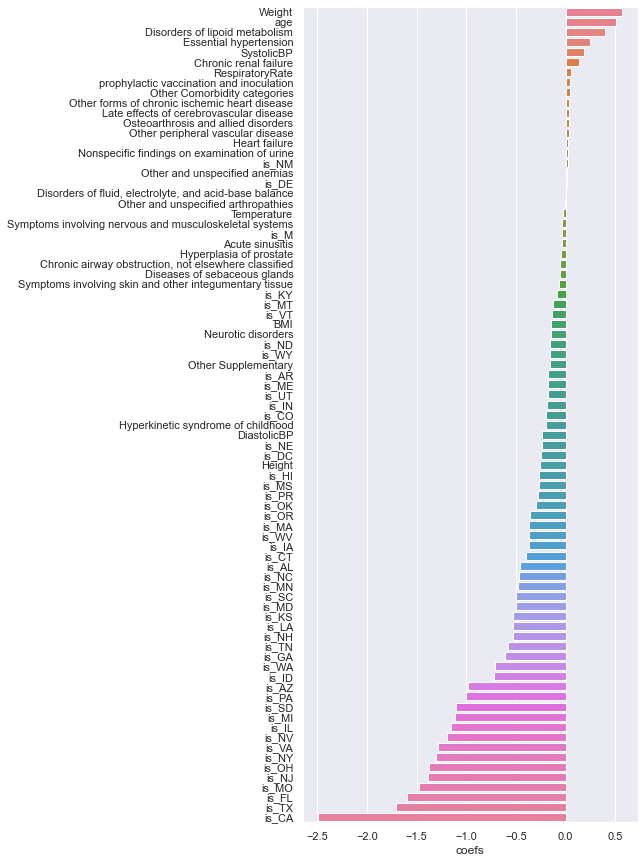

In [928]:
data_feature = pd.DataFrame({"feature":X_train.columns,"coefs":logreg.coef_[0]}).sort_values("coefs",ascending=False)
sns.set(rc = {'figure.figsize':(6,15)})
sns.barplot(x="coefs",y="feature",data=data_feature,palette="husl");
plt.ylabel("");

### Brier score 

In [929]:
from sklearn.metrics import brier_score_loss
brier_score_loss(y_test, y_pred_proba)

0.12348883882562496

### Output forecast DMIndicatorForecast

In [930]:
test = pd.read_csv("test_SyncPatient.csv").dropna()

# data cleaning 
test["age"] = (2022 - test["YearOfBirth"]).astype(int)
test = test.drop("YearOfBirth",axis=1)
test = test.reset_index().drop("index",axis=1)

# merge transcript
test = pd.merge(test,transcript,how="left",on="PatientGuid")
test = test.set_index("PatientGuid").join(diagnosis_agg).reset_index()

# select columns
X = test[X_cols]

# one hot encoding 
X = pd.get_dummies(X,prefix="is",drop_first=True) 


# join a missing column
X.insert(57, 'is_MT', 0)

# standardscalar

X_std = scalar.transform(X)

# forecast
y_test_forecast = logreg.predict(X_std)
y_test_forecast

array([0., 0., 0., ..., 0., 0., 0.])

In [935]:
y_pred_proba_forecast = logreg.predict_proba(X_std)[::,1]
y_pred_proba_forecast

array([0.03800028, 0.12129533, 0.46269037, ..., 0.1202046 , 0.05058807,
       0.46167493])

In [931]:
sum(y_test_forecast==1)

362

In [932]:
test_SyncPatientForecast = pd.DataFrame({"PracticeGuid":test["PracticeGuid"],"DMIndicatorForecast":y_test_forecast})
# test_SyncPatientForecast.to_csv("test_SyncPatientForecast.csv")

In [942]:
test_SyncPatientForecast_prob = pd.DataFrame({"PracticeGuid":test["PracticeGuid"],"DMIndicatorForecast":y_pred_proba_forecast})
test_SyncPatientForecast_prob.to_csv("test_SyncPatientForecast_prob.csv",index=False)

In [943]:
test_SyncPatientForecast_prob

,PracticeGuid,DMIndicatorForecast
0,4D27688B-C925-4513-9CF9-8D281ACC6712,0.038000
1,44C560D5-82B4-436A-9C72-C090F5377FD0,0.121295
2,9891CFAA-9B40-4120-AE20-3A1D86064898,0.462690
3,64F84808-F87B-41CF-8E4B-5E0F456359B4,0.430727
4,BD209FBC-E92C-4392-A085-1DDA42AF37BA,0.094974
...,...,...
3343,E7101967-2FF1-4B0F-8129-B0B429D1D15C,0.042723
3344,EADEC07A-9901-411F-BBE3-04376029E1E8,0.000141
3345,57B6F75F-CF0A-4225-BAD0-8222A7D4B489,0.120205
3346,1A69F223-8409-4FDC-A26C-114677D2D4C3,0.050588
